### Gradient Descent for Logistic Regression
    Gradient descent helps to find out the best parameters w and b by minimizing the logistic cost by descending the gradients across the cost curve.
    
    Cost function J = -1/m Σ (yi log (f(xi)) + (1 - yi) log(f(xi))  where i tends from o to m
    
    Gradients: (same as linear regression but different f(x))
    ---------
        dJ /dwj = 1/m Σ (f(xi) - yi) xij 
                
        dJ / db = 1 / m Σ (f(xi) - yi)
        
                    Note w is a vector of size n. where i tends from 0 to m and j tends from 0 to n 
        
     Gradient descent parameter update:
     ---------------------------------
         wj = wj - alpha * dJ / dwj
         b = b - alpha * dJ / db

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
plt.rcParams["font.size"] = 8
import copy, math

dlc = dict(dlblue="#0096ff", dlorange="#FF9300", dldarkred="#C00000", dlmagenta="#FF40FF", dlpurple="#7030A0")

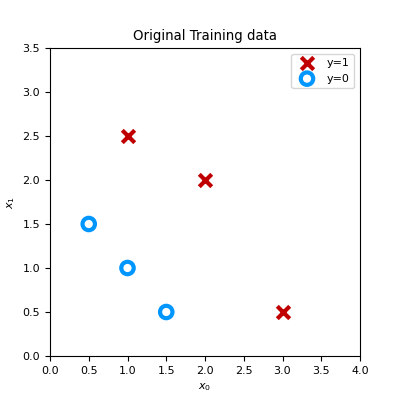

In [18]:
x_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

def plot_data(x, y, ax, pos_label="y=1", neg_label="y=0"):
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False
    
    pos = y==1
    neg = y==0
    pos = pos.reshape(-1,) 
    neg = neg.reshape(-1,)
    ax.scatter(x[pos, 0], x[pos, 1], label=pos_label, marker="x", c=dlc["dldarkred"], s=80, lw=3)
    ax.scatter(x[neg, 0], x[neg, 1], label=neg_label, marker="o", s=80, facecolors="None", edgecolors=dlc["dlblue"], lw=3)
    ax.legend(loc="best")

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(x_train, y_train, ax)
ax.axis((0.0, 4.0, 0.0, 3.5))
ax.set_xlabel(r"$x_0$"); ax.set_ylabel(r"$x_1$");
ax.set_title("Original Training data")
plt.show()
    
    

In [28]:
#Calculating Gradients for sample w and b
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_gradient_logistic(x, y, w, b):
    m, n = x.shape                      #scalar
    dj_dw = np.zeros((n,))       #(n,)
    dj_db = 0.0                  #scalar
    for i in range(m):
        z_i = np.dot(x[i], w) + b     # (1, n) (n,) = (1,) = scalar
        f_wb_i = sigmoid(z_i)           # scalar
        err_i = f_wb_i - y[i]           #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i, j]
        dj_db = dj_db + err_i
    dj_db = dj_db / m                   #scalar
    dj_dw = dj_dw / m                  #(n,)
    return(dj_dw, dj_db)

x_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) #(m, n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
w_temp = np.array([2., 3.])                                                      #(n,)
b_temp = 1.                                                                      #scalar
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(x_train, y_train, w_temp, b_temp)
print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw: {dj_dw_tmp.tolist()}")

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [58]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_logistic_cost(x, y, w, b, safe=True):
    m, n = x.shape
    z = np.dot(x , w) + b        # (6,)
    f = sigmoid(z)                # (6,)            
    cost = 0.0
    if safe:
        cost = - (y * z) + np.log(1 + np.exp(z)) #to avoid log 0 = infinity
        cost = np.sum(cost) / m
    else:
        cost = np.dot(-y.T, np.log(f)) - np.dot((1-y).T, (1-np.log(f)))
        cost = cost / m
    return cost

#gradient descent updating params
def gradient_descent(x, y, w, b, alpha=0.01, num_iters=1000):
    m, n = x.shape
    w = copy.deepcopy(w)         #w = [w1, w2] (n,)
    b = b                        #scalar 
    hist = dict()
    hist["cost"], hist["params"], hist["iters"], hist["grads"] = [], [], [], []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        if i < 10000:
            hist["grads"].append([dj_dw, dj_db])
            hist["params"].append([w, b])
            cost = compute_logistic_cost(x, y, w, b)
            hist["cost"].append(cost)
            hist["iters"].append(i)
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration: {i},  Cost: {cost:.3f}")
    return w, b, hist

x_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) #(m, n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
w_init = np.array([0., 0.])
b_init = 0.0
w_out, b_out, hist = gradient_descent(x_train, y_train, w_init, b_init, alpha=0.1, num_iters=10000)
print(f"Final params - w: {w_out.tolist()}, b: {b_out}")

Iteration: 0,  Cost: 0.685
Iteration: 1000,  Cost: 0.159
Iteration: 2000,  Cost: 0.085
Iteration: 3000,  Cost: 0.057
Iteration: 4000,  Cost: 0.043
Iteration: 5000,  Cost: 0.034
Iteration: 6000,  Cost: 0.029
Iteration: 7000,  Cost: 0.025
Iteration: 8000,  Cost: 0.021
Iteration: 9000,  Cost: 0.019
Final params - w: [5.281230291780549, 5.078156075159833], b: -14.222409982019837


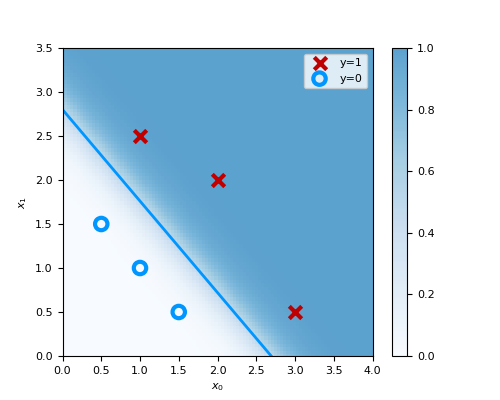

In [78]:
#Plotting the gradient descent
from matplotlib import cm
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    #https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def plt_prob(w_out, b_out, ax):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)

#     # get probability for x0, x1 ranges using indexing
#     tmp_x0, tmp_x1 = np.meshgrid(x0_space, x1_space)
#     z = np.zeros_like(tmp_x0)
#     for i in range(tmp_x0.shape[0]):
#         for j in range(tmp_x1.shape[1]):
#             z[i, j] = sigmoid(np.dot(w_out, np.array([tmp_x0[i, j], tmp_x1[i, j]])) + b_out)
    
    tmp_x0, tmp_x1 = np.meshgrid(x0_space, x1_space)
    points = np.c_[tmp_x0.ravel(), tmp_x1.ravel()]
    z = np.zeros(points.shape[0])
    for i in range(points.shape[0]):
        z[i] = sigmoid(np.dot(w_out, points[i]) + b_out)
    z = z.reshape(tmp_x0.shape)
    
    #color map and color bar customization
    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.6)
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z,
                        norm=cm.colors.Normalize(vmin=0, vmax=1),
                        cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plt_prob(w_out, b_out, ax)

ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")
ax.axis([0, 4, 0, 3.5])
plot_data(x_train, y_train, ax)

# Plot the decision boundary
x0 = -b_out / w_out[0]
x1 = -b_out / w_out[1]
ax.plot([0, x0], [x1, 0], c=dlc["dlblue"], lw=2)
plt.show()

#In the plot
 #- the shading reflects the probability y=1 (result prior to decision boundary)
 #- the decision boundary is the line at which the probability = 0.5

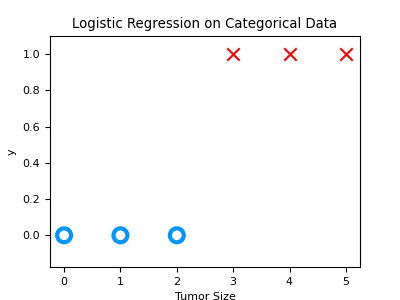

In [80]:
#Contour plot for gradient descent for univariate categorical dataset

#With just two parameters, w, b it is possible to plot the cost function using a contour plot
#to get a better idea of what gradient descent is up to

x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

def plt_tumor_data(x, y, ax):
    """ plots tumor data on one axis """
    pos = y==1
    neg = y==0

    ax.scatter(x[pos], y[pos], marker="x", s=80, c = "red", label="malignant")
    ax.scatter(x[neg], y[neg], marker="o", s=100, label="benign", facecolors="none", edgecolors=dlc["dlblue"], lw=3)
    ax.set_ylim(-0.175, 1.1)
    ax.set_ylabel("y")
    ax.set_xlabel("Tumor Size")
    ax.set_title("Logistic Regression on Categorical Data")

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False
    
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

    In the plot below, try:
    changing w and b by clicking within the contour plot on the upper right.
         - changes may take a second or two
         - note the changing value of cost on the upper left plot
         - note the cost is accumulated by a loss on each example (vertical dotted lines)
      - run gradient descent by clicking the orange button.
         - note the steadily decreasing cost (contour and cost plot are in log(cost) 
         - clicking in the contour plot will reset the model for a new run
    - to reset the plot, rerun the cell

In [114]:
"""
plt_quad_logistic.py
    interactive plot and supporting routines showing logistic regression
"""

import time
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Button
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

# for debug
output = Output() # sends hidden error messages to display when using widgets
display(output)

Output()

In [115]:
class cost_plot:
    """ manages cost plot for plt_quad_logistic """
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self,ax):
        self.ax = ax
        self.ax.set_ylabel("log(cost)")
        self.ax.set_xlabel("iteration")
        self.costs = []
        self.cline = self.ax.plot(0, 0, color=dlc["dlblue"])

    def re_init(self):
        self.ax.clear()
        self.__init__(self.ax)

    def add_cost(self,J_hist):
        self.costs.extend(J_hist)
        self.cline[0].remove()
        self.cline = self.ax.plot(self.costs)

In [116]:
class path:
    ''' tracks paths during gradient descent on contour plot '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, w, b, ax):
        ''' w, b at start of path '''
        self.path_items = []
        self.w = w
        self.b = b
        self.ax = ax

    def re_init(self, w, b):
        for artist in self.path_items:
            artist.remove()
        self.path_items = []
        self.w = w
        self.b = b

    def add_path_item(self, w, b):
        a = FancyArrowPatch(
            posA=(self.w, self.b), posB=(w, b), color=dlc["dlblue"],
            arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
        )
        self.ax.add_artist(a)
        self.path_items.append(a)
        self.w = w
        self.b = b

In [117]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    """
    Computes the cost using  using matrices
    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameter(s) of the model
      b : (scalar )                       Values of parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns:
      total_cost: (scalar)                cost
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + np.log(1 + np.exp(z))
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0, 0]                                                        # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost   

def compute_gradient_matrix(X, y, w, b, logistic=False, lambda_=0):
    """
    Computes the gradient using matrices

    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameters of the model
      b : (scalar )                       Values of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
    Returns
      dj_dw: (array_like Shape (n,1))     The gradient of the cost w.r.t. the parameters w
      dj_db: (scalar)                     The gradient of the cost w.r.t. the parameter b
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D

    f_wb  = sigmoid( X @ w + b ) if logistic else  X @ w + b      # (m,n)(n,1) = (m,1)
    err   = f_wb - y                                              # (m,1)
    dj_dw = (1/m) * (X.T @ err)                                   # (n,m)(m,1) = (n,1)
    dj_db = (1/m) * np.sum(err)                                   # scalar

    dj_dw += (lambda_/m) * w        # regularize                  # (n,1)

    return dj_db, dj_dw   

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, logistic=False, lambda_=0, verbose=True):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray):    Shape (m,n)         matrix of examples
      y (ndarray):    Shape (m,) or (m,1) target value of each example
      w_in (ndarray): Shape (n,) or (n,1) Initial values of parameters of the model
      b_in (scalar):                      Initial value of parameter of the model
      logistic: (boolean)                 linear if false, logistic if true
      lambda_:  (float)                   applies regularization if non-zero
      alpha (float):                      Learning rate
      num_iters (int):                    number of iterations to run gradient descent

    Returns:
      w (ndarray): Shape (n,) or (n,1)    Updated values of parameters; matches incoming shape
      b (scalar):                         Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    w = w.reshape(-1,1)      #prep for matrix operations
    y = y.reshape(-1,1)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient_matrix(X, y, w, b, logistic, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_matrix(X, y, w, b, logistic, lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            if verbose: print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w.reshape(w_in.shape), b, J_history  #return final w,b and J history for graphing

In [118]:
class contour_and_surface_plot:
    ''' plots combined in class as they have similar operations '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, axc, axs, x_train, y_train, w_range, b_range, w, b):

        self.x_train = x_train
        self.y_train = y_train
        self.axc = axc #axes for contour plot
        self.axs = axs #axes for surface plot

        #setup useful ranges and common linspaces
        b_space  = np.linspace(*b_range, 100)
        w_space  = np.linspace(*w_range, 100)

        # get cost for w,b ranges for contour and 3D
        tmp_b, tmp_w = np.meshgrid(b_space, w_space)
        z = np.zeros_like(tmp_b)
        for i in range(tmp_w.shape[0]):
            for j in range(tmp_w.shape[1]):
                z[i, j] = compute_cost_matrix(x_train.reshape(-1, 1), y_train, tmp_w[i, j], tmp_b[i, j],
                                             logistic=True, lambda_=0, safe=True)
                if z[i, j] == 0: #to prevent cost overflow
                    z[i, j] = 1e-9

        ### plot contour ###
        CS = axc.contour(tmp_w, tmp_b, np.log(z), levels=12, linewidths=2, alpha=0.7, colors=dlcolors)
        axc.set_title('log(Cost(w,b))')
        axc.set_xlabel('w', fontsize=10)
        axc.set_ylabel('b', fontsize=10)
        axc.set_xlim(w_range)
        axc.set_ylim(b_range)
        self.update_contour_wb_lines(w, b, firsttime=True)
        axc.text(0.7, 0.05, "Click to choose w,b",  bbox=dict(facecolor='white', ec = 'black'), fontsize = 10,
                transform=axc.transAxes, verticalalignment = 'center', horizontalalignment= 'center')

        #Surface plot of the cost function J(w,b)
        axs.plot_surface(tmp_w, tmp_b, z, cmap = cm.jet, alpha=0.3, antialiased=True)
        axs.plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
        axs.set_xlabel("$w$")
        axs.set_ylabel("$b$")
        axs.zaxis.set_rotate_label(False)
        axs.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        axs.set_zlabel("J(w, b)", rotation=90)
        axs.view_init(30, -120)

        axs.autoscale(enable=False)
        axc.autoscale(enable=False)

        self.path = path(self.w, self.b, self.axc)  # initialize an empty path, avoids existance check

    def update_contour_wb_lines(self, w, b, firsttime=False):
        self.w = w
        self.b = b
        cst = compute_cost_matrix(self.x_train.reshape(-1,1), self.y_train, np.array(self.w), self.b,
                                  logistic=True, lambda_=0, safe=True)

        # remove lines and re-add on contour plot and 3d plot
        if not firsttime:
            for artist in self.dyn_items:
                artist.remove()
        a = self.axc.scatter(self.w, self.b, s=100, color=dlc["dlblue"], zorder= 10, label="cost with \ncurrent w,b")
        b = self.axc.hlines(self.b, self.axc.get_xlim()[0], self.w, lw=4, color=dlc["dlpurple"], ls='dotted')
        c = self.axc.vlines(self.w, self.axc.get_ylim()[0], self.b, lw=4, color=dlc["dlpurple"], ls='dotted')
        d = self.axc.annotate(f"Cost: {cst:0.2f}", xy=(self.w, self.b), xytext=(4, 4), textcoords='offset points',
                           bbox=dict(facecolor='white'), size=10)
        #Add point in 3D surface plot
        e = self.axs.scatter3D(self.w, self.b, cst , marker='X', s=100)

        self.dyn_items = [a, b, c, d, e]

In [119]:
class data_plot:
    ''' handles data plot '''
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, ax, x_train, y_train, w, b):
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train
        self.m = x_train.shape[0]
        self.w = w
        self.b = b

        self.plt_tumor_data()
        self.draw_logistic_lines(firsttime=True)
        self.mk_cost_lines(firsttime=True)

        self.ax.autoscale(enable=False) # leave plot scales the same after initial setup

    def plt_tumor_data(self):
        x = self.x_train
        y = self.y_train
        pos = y == 1
        neg = y == 0
        self.ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
        self.ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none',
                   edgecolors=dlc["dlblue"], lw=3)
        self.ax.set_ylim(-0.175,1.1)
        self.ax.set_ylabel('y')
        self.ax.set_xlabel('Tumor Size')
        self.ax.set_title("Logistic Regression on Categorical Data")

    def update(self, w, b):
        self.w = w
        self.b = b
        self.draw_logistic_lines()
        self.mk_cost_lines()

    def draw_logistic_lines(self, firsttime=False):
        if not firsttime:
            self.aline[0].remove()
            self.bline[0].remove()
            self.alegend.remove()

        xlim  = self.ax.get_xlim()
        x_hat = np.linspace(*xlim, 30)
        y_hat = sigmoid(np.dot(x_hat.reshape(-1, 1), self.w) + self.b)
        self.aline = self.ax.plot(x_hat, y_hat, color=dlc["dlblue"],
                                     label="y = sigmoid(z)")
        f_wb = np.dot(x_hat.reshape(-1, 1), self.w) + self.b
        self.bline = self.ax.plot(x_hat, f_wb, color=dlc["dlorange"], lw=1,
                                     label=f"z = {np.squeeze(self.w):0.2f}x+({self.b:0.2f})")
        self.alegend = self.ax.legend(loc='upper left')

    def mk_cost_lines(self, firsttime=False):
        ''' makes vertical cost lines'''
        if not firsttime:
            for artist in self.cost_items:
                artist.remove()
        self.cost_items = []
        cstr = f"cost = (1/{self.m})*("
        ctot = 0
        label = 'cost for point'
        addedbreak = False
        for p in zip(self.x_train, self.y_train):
            f_wb_p = sigmoid(self.w * p[0] + self.b)
            c_p = compute_cost_matrix(p[0].reshape(-1, 1), p[1], np.array(self.w), self.b, logistic=True, lambda_=0, safe=True)
            c_p_txt = c_p
            a = self.ax.vlines(p[0], p[1], f_wb_p, lw=3, color=dlc["dlpurple"], ls='dotted', label=label)
            label = "" #just one
            cxy = [p[0], p[1] + (f_wb_p - p[1]) / 2]
            b = self.ax.annotate(f'{c_p_txt : 0.1f}', xy=cxy, xycoords='data',color=dlc["dlpurple"],
                        xytext=(5, 0), textcoords='offset points')
            cstr += f"{c_p_txt:0.1f} +"
            if len(cstr) > 38 and addedbreak is False:
                cstr += "\n"
                addedbreak = True
            ctot += c_p
            self.cost_items.extend((a, b))
        ctot = ctot / (len(self.x_train))
        cstr = cstr[:-1] + f") = {ctot:0.2f}"
        ## todo.. figure out how to get this textbox to extend to the width of the subplot - c._get_wrap_line_width = lambda : 250
        c = self.ax.text(0.05, 0.02, cstr, transform=self.ax.transAxes, color=dlc["dlpurple"])
        self.cost_items.append(c)

In [120]:
class plt_quad_logistic:
    ''' plots a quad plot showing logistic regression '''
    # pylint: disable=too-many-instance-attributes
    # pylint: disable=too-many-locals
    # pylint: disable=missing-function-docstring
    # pylint: disable=attribute-defined-outside-init
    def __init__(self, x_train, y_train, w_range, b_range):
        # setup figure
        fig = plt.figure(figsize=(10, 6))
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.set_facecolor('skyblue') #white #ffffff
        
        gs  = GridSpec(2, 2, figure=fig)
        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1])
        ax2 = fig.add_subplot(gs[1, 0],  projection='3d')
        ax3 = fig.add_subplot(gs[1,1])
        
        # ax3.get_position() - Return the position of the Axes within the figure as a Bbox
        #basically getting a copy of the axes rectangle in the figure as a Bbox..
        pos = ax3.get_position().get_points()  
        ##[[lb_x, lb_y], [rt_x, rt_y]] [[0.54772727, 0.11], [0.9, 0.46]] - lb = leftbelow, rt - right top [xmin, ymin] [xmax, y max] x max = width of axes, y max = height of axes
        h = 0.05 
        width = 0.2
        axcalc   = plt.axes([pos[1, 0] - width, pos[1, 1] - h, width, h])  #lx, by, w, h #setting the button configs(pos, height and width)
        ax = np.array([ax0, ax1, ax2, ax3, axcalc])
        
        self.fig = fig
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train

        self.w = 0. #initial point, non-array
        self.b = 0.

        # initialize subplots
        self.dplot = data_plot(ax[0], x_train, y_train, self.w, self.b) #first plot
        self.con_plot = contour_and_surface_plot(ax[1], ax[2], x_train, y_train, w_range, b_range, self.w, self.b) #2nd, 3rd plot
        self.cplot = cost_plot(ax[3]) #4th plot

        # setup events
        self.cid = fig.canvas.mpl_connect('button_press_event', self.click_contour)
        
        self.bcalc = Button(axcalc, 'Run Gradient Descent \nfrom current w,b (click)', color=dlc["dlorange"])
        self.bcalc.on_clicked(self.calc_logistic)

    @output.capture()  # debug
    def click_contour(self, event):
        ''' called when click in contour '''
        if event.inaxes == self.ax[1]:   #contour plot
            self.w = event.xdata
            self.b = event.ydata

            self.cplot.re_init()
            self.dplot.update(self.w, self.b)
            self.con_plot.update_contour_wb_lines(self.w, self.b)
            self.con_plot.path.re_init(self.w, self.b)

            self.fig.canvas.draw()

    @output.capture()  # debug
    def calc_logistic(self, event):
        ''' called on run gradient event '''
        for it in [1, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
            w, self.b, J_hist = gradient_descent(self.x_train.reshape(-1, 1), self.y_train.reshape(-1, 1),
                                                 np.array(self.w).reshape(-1, 1), self.b, 0.1, it,
                                                 logistic=True, lambda_=0, verbose=False)
            self.w = w[0, 0]
            self.dplot.update(self.w, self.b)
            self.con_plot.update_contour_wb_lines(self.w, self.b)
            self.con_plot.path.add_path_item(self.w, self.b)
            self.cplot.add_cost(J_hist)

            time.sleep(0.3)
            self.fig.canvas.draw()

    In the plot below, try:
    changing w and b by clicking within the contour plot on the upper right.
         - changes may take a second or two
         - note the changing value of cost on the upper left plot
         - note the cost is accumulated by a loss on each example (vertical dotted lines)
      - run gradient descent by clicking the orange button.
         - note the steadily decreasing cost (contour and cost plot are in log(cost) 
         - clicking in the contour plot will reset the model for a new run
    - to reset the plot, rerun the cell

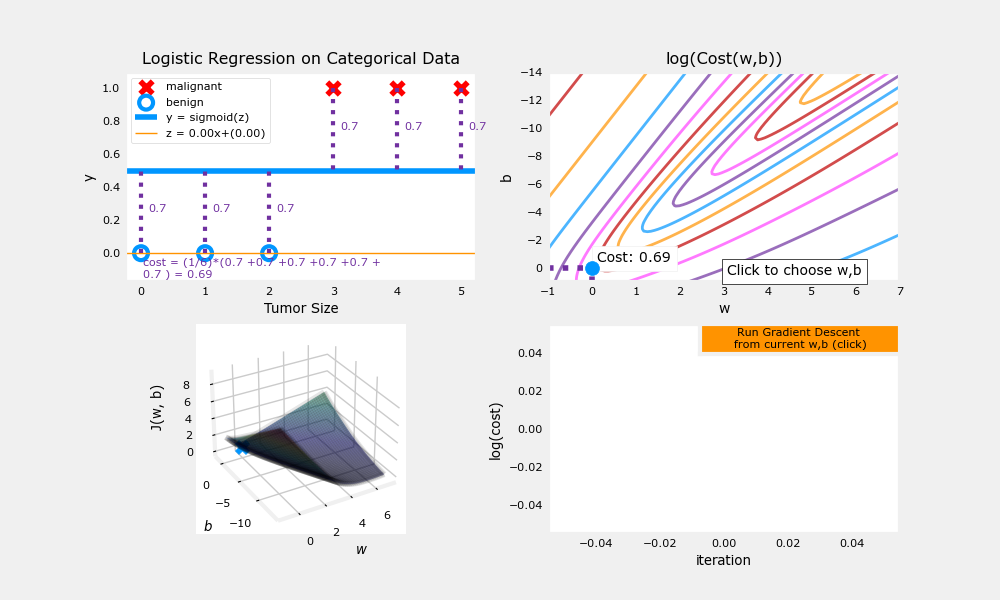

In [121]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic(x_train, y_train, w_range, b_range )